Task 1: Model the process as a Markov chain. Choose as states the number of balls in the
frst urn. Write a function to make the transition matrix P for general k. Print out your
transition matrix for k = 2 (which should be 5 x 5). Draw the directed graph of the chain
for k = 2 case

In [ ]:
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

def create_transition_matrix(k):
    num_states = 2 * k + 1
    transition_matrix = np.zeros((num_states, num_states))

    for i in range(num_states):
      if i< num_states-1:
        transition_matrix[i, i + 1] = (2*k-i)/(2*k)
      if i>0:
        transition_matrix[i, i - 1] = i/(2*k)
    return transition_matrix
k = 2
transition_matrix_k2 = create_transition_matrix(k)
print(transition_matrix_k2)

[[0.   1.   0.   0.   0.  ]
 [0.25 0.   0.75 0.   0.  ]
 [0.   0.5  0.   0.5  0.  ]
 [0.   0.   0.75 0.   0.25]
 [0.   0.   0.   1.   0.  ]]


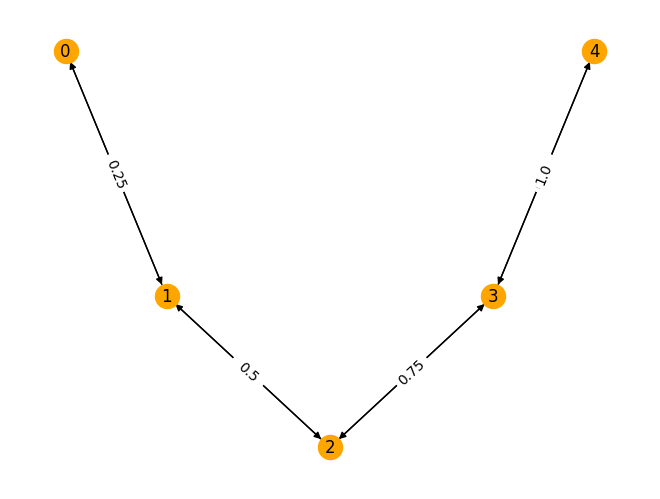

In [ ]:
gP = nx.from_numpy_array(transition_matrix_k2, create_using=nx.DiGraph)

def plot_gph(g):
  pos = nx.spectral_layout(g)
  nx.draw(g, pos, with_labels=True, node_color='orange')
  labels = nx.get_edge_attributes(g, 'weight')
  nx.draw_networkx_edge_labels(g, pos, edge_labels=labels);

plot_gph(gP)

In [ ]:
from numpy import linalg

ew,ev = linalg.eig(transition_matrix_k2)

In [ ]:
k = 100
transition_matrix_k2 = create_transition_matrix(k)

from numpy import linalg

ew,ev = linalg.eig(transition_matrix_k2.T)

 Plot the stationary distribution of this Markov chain for k = 100.

In [ ]:
abs(ew)

array([1.00000000e+00, 1.00000000e+00, 9.90000000e-01, 9.80000000e-01,
       9.70000000e-01, 9.60000000e-01, 9.50000000e-01, 9.40000000e-01,
       9.30000000e-01, 9.20000000e-01, 9.10000000e-01, 9.00000000e-01,
       9.90000000e-01, 9.80000000e-01, 9.70000000e-01, 9.60000000e-01,
       9.50000000e-01, 9.40000000e-01, 9.30000000e-01, 9.20000000e-01,
       9.10000000e-01, 9.00000000e-01, 8.90000000e-01, 8.79999987e-01,
       8.70000024e-01, 8.60000186e-01, 8.49999667e-01, 8.39998386e-01,
       8.30002454e-01, 8.20009341e-01, 8.90000000e-01, 8.79999987e-01,
       8.70000024e-01, 8.60000192e-01, 8.49999669e-01, 8.39998352e-01,
       8.09990026e-01, 8.30002413e-01, 7.99960810e-01, 8.20009418e-01,
       7.90017358e-01, 8.09990396e-01, 7.80148977e-01, 7.99961400e-01,
       7.90015196e-01, 7.80141902e-01, 7.69927079e-01, 7.58888460e-01,
       7.52435869e-01, 7.69934733e-01, 7.58955874e-01, 7.52381113e-01,
       7.42557480e-01, 7.27940017e-01, 7.27940017e-01, 7.23127583e-01,
      

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


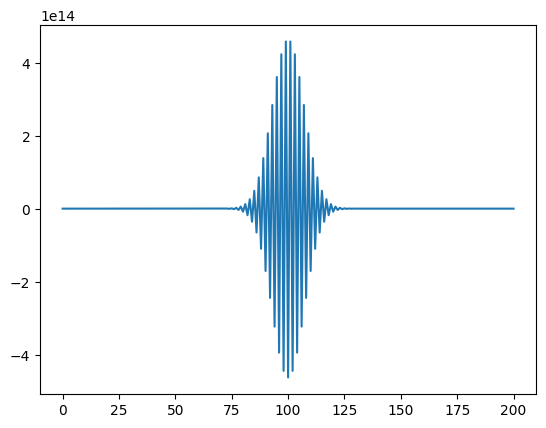

In [ ]:
plt.plot(ev[:,0]/np.sum(ev[:,0]))

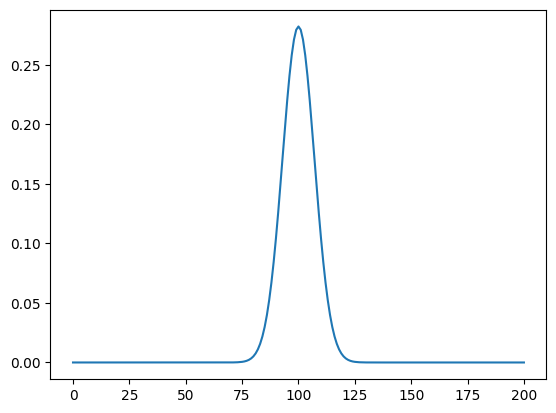

In [ ]:
plt.plot(ev[:,1])

In [ ]:
np.sum(ev[:,1])

(5.0081886998673255+0j)

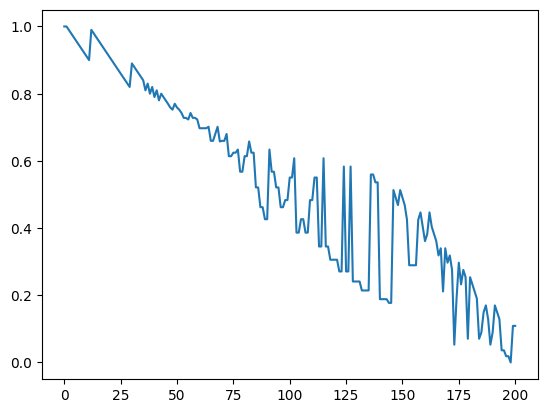

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.abs(ew))

In [ ]:
np.abs(abs(ew) - 1) <= 1e-14

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

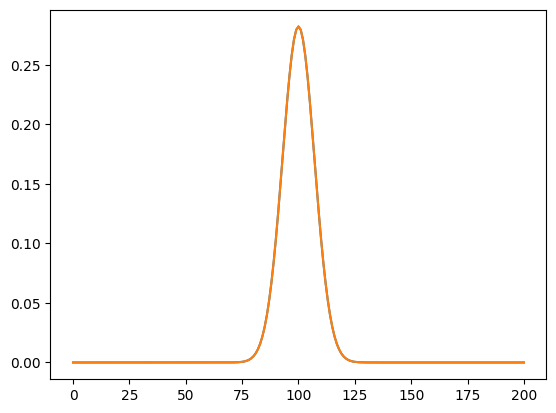

In [ ]:
plt.plot(np.abs(ev[:,0]))
plt.plot(np.abs(ev[:,1]))

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


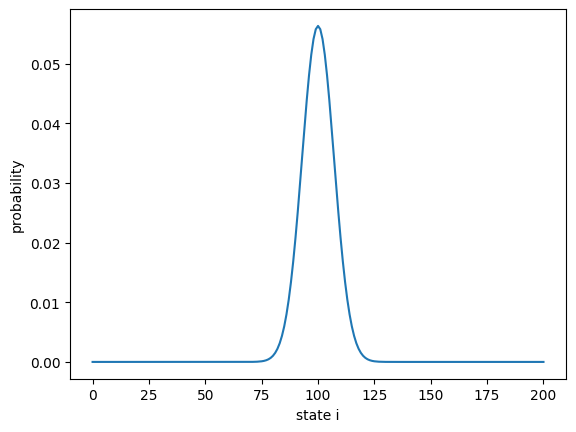

In [ ]:
lmbda = ev[:,1]/np.sum((ev[:,1]))
plt.plot(lmbda)
plt.xlabel('state i')
plt.ylabel('probability')
plt.show()


 Does P^n converge as n → ∞

In [ ]:
error =[]

# def power(M,n):
#   if n = 1:
#     return M
#   else:
#     return power(M,n-1) @


k1 = transition_matrix_k2
for i in range(10000):
  k1 = k1@transition_matrix_k2
  k2 = k1@transition_matrix_k2
  error.append(np.sum(np.abs(k2-k1)))

Text(0, 0.5, ' error between P^n - p^(n-1)')

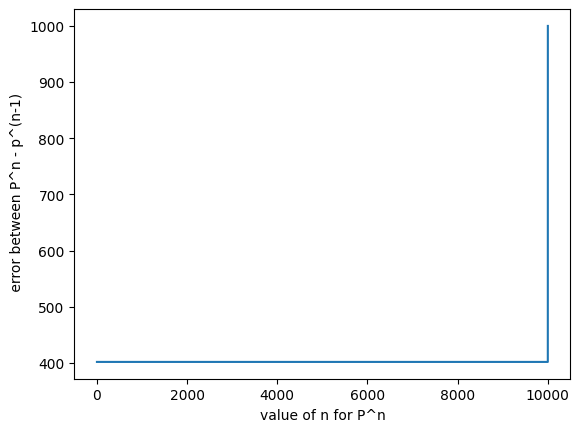

In [ ]:

error.append(1000)
plt.plot(error)
plt.xlabel('value of n for P^n')
plt.ylabel(' error between P^n - p^(n-1)')

NO! as error doesn't goes to 0 for large n.

In [ ]:
l = np.array([1/201 for i in range(201)])

In [ ]:
l2 =l.resize((1,201))
np.abs(l@k1 - ev[:,1]) > 1e-15

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [ ]:
np.sum(k1,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])